# K-means Clustering
A technique that iteratively groups data points together by similarity. It is unsupervised learning because you don't have prescribed labels in the data.

<u>For example, if we set k=3 in a K-means algorithm:</u>
1. Randomly initialize three points (cluster centroids).
2. The algorithm goes through each of the data points and depending on which cluster is closer, it assigns the data point to one of the three cluster centroids.
3. K-means moves the centroids to the average of the points in a cluster.
4. The process is repeated (iterate) until there is no change in the clusters.

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

### Import libraries

In [1]:
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from datetime import datetime

### Import data

In [2]:
df_pca = joblib.load('../3.customer_segmentation/data/df_pca.p')

In [3]:
transformed_df = joblib.load('../3.customer_segmentation/data/transformed_df.p')

### Picking an optimal *k*
Given that a visual overview of the data didn’t suggest an obvious choice for the number of clusters, and we don’t have prior information (or a request from the business) to produce a specified number of clusters, the next challenge is to determine how many clusters to extract. 

Use KMeans to cluster your data. Evaluate different values of K visually and with the silhouette score. Justify your choice.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
for i,k  in enumerate(range(2,8)):
    print(i,k)

0 2
1 3
2 4
3 5
4 6
5 7


0:00:55.740345


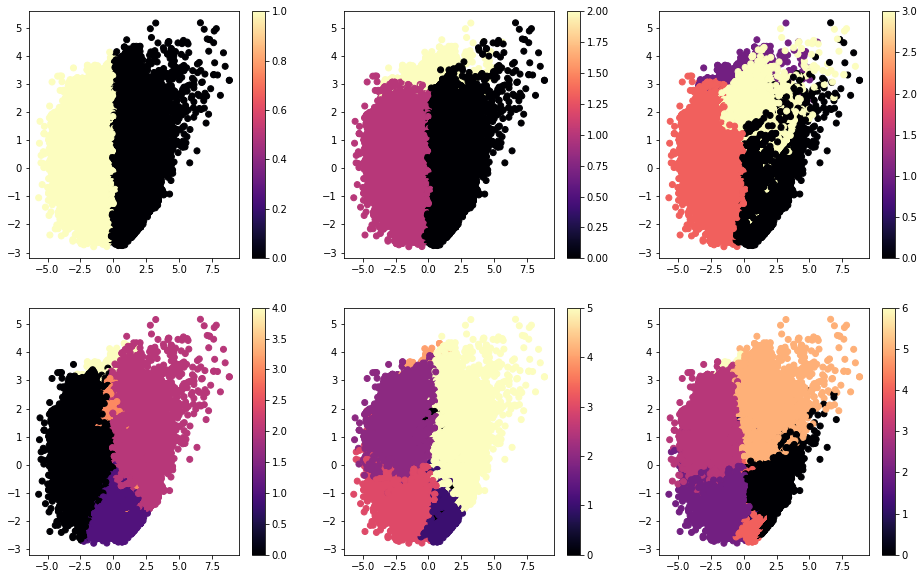

In [5]:
start = datetime.now()

ks = []
sils = []
plt.figure(figsize=(16,10))
for i,k  in enumerate(range(2,8)):
    km = KMeans(n_clusters=k)
    km.fit(transformed_df)
    plt.subplot(231+i)
    plt.scatter(df_pca.T[0], df_pca.T[1], c=km.labels_, cmap='magma')
    plt.colorbar()
    
end = datetime.now()
print(end - start)

In [11]:
km_pca = KMeans(n_clusters=2)
km_pca.fit_transform(df_pca)

array([[ 2.68466359,  2.92980977],
       [ 2.80758949,  2.91565728],
       [ 2.64594691,  2.99275791],
       ..., 
       [ 2.41381699,  1.93015963],
       [ 3.81487377,  2.18714365],
       [ 3.57527508,  1.9787432 ]])

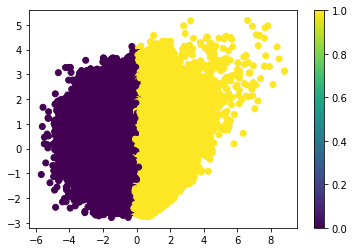

In [12]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=km_pca.labels_)
plt.colorbar()

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
labels = km_pca.predict(df_pca)
C = km_pca.cluster_centers_

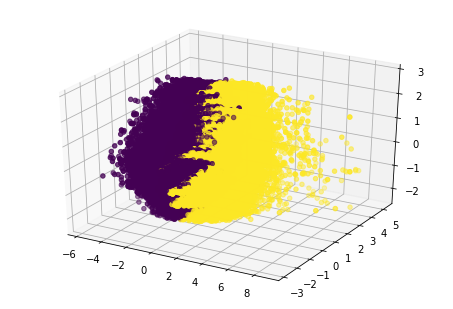

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=km_pca.labels_)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)